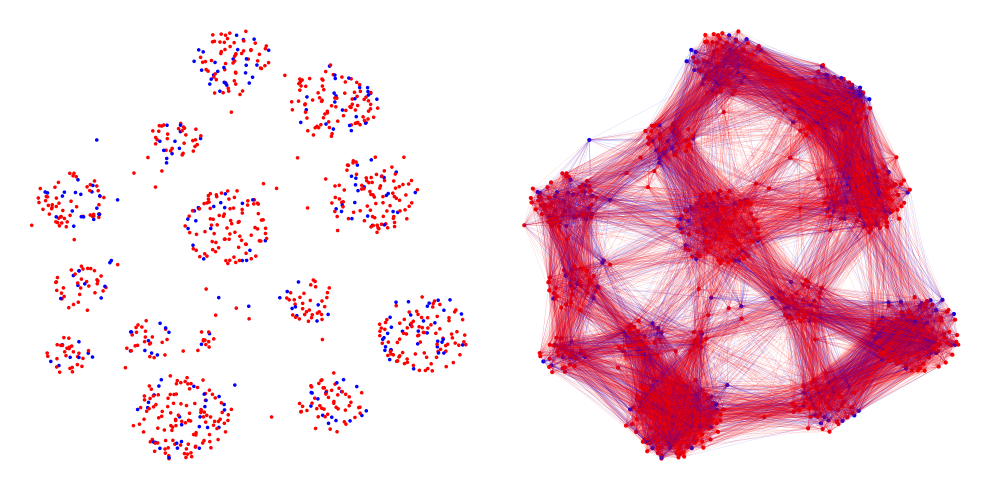

In [45]:
import numpy as np
import matplotlib.pyplot as plt

topology_path = './export/CONFIG1043 SNN1/'

import json 
with open(topology_path+'nType_new-CONFIG1043-SNN1-10min.txt', 'r') as f_nType:
    ntype = json.load(f_nType)
with open(topology_path+'sType_new-CONFIG1043-SNN1-10min.txt', 'r') as f_sType:
    stype = json.load(f_sType)
with open(topology_path+'xyPos_new-CONFIG1043-SNN1-10min.txt', 'r') as f_xyPos:
    xypos = json.load(f_xyPos)

# Neuron model
NRN_EXC = "RSrat"    # Excitatory neuron is customized RS from "HHparam.py" <EDIT>
NRN_INH = "FSorg"    # Inhibitory neuron is customized FS from "HHparam.py" <EDIT>
# Colors
COLOR_EXC = "red"   # Color for excitatory neurons and synaptic connections
COLOR_INH = "blue"  # Color for inhibitory neurons and synaptic connections
# Synaptic connections plot
SYN_NONE =       "destexhe_none"      # No synapse is none from "Synapses.py"
SYN_EXC_AMPA =   "destexhe_ampa"      # Excitatory synapse is AMPA from "Synapses.py"
SYN_EXC_NMDA =   "destexhe_nmda"      # Excitatory synapse is NMDA from "Synapses.py"
SYN_INH =        "destexhe_gabaa"     # Inhibitory synapse is GABAa from "Synapses.py"

fig, ax = plt.subplots(1, 2, layout = 'tight', figsize = (10, 5), squeeze=False)

# XY position plot
if ntype:
    colors = [COLOR_INH if t==NRN_INH else COLOR_EXC for t in ntype]
    ax[0][0].scatter(xypos[0], xypos[1], label=",", color=colors,  marker=".", s=10)
else:
    ax[0][0].scatter(xypos[0], xypos[1], label=",", color="black", marker=".", s=10)
#ax[0][0].set_title('SNN topology')

# Neurons
colors = [COLOR_INH if t==NRN_INH else COLOR_EXC for t in ntype]
ax[0][1].scatter(xypos[0], xypos[1], label= ",", color=colors, marker= ".", s=15)
# Connections
for dest in range(len(ntype)):
    for src in range(len(ntype)):
        if stype[dest][src] != SYN_NONE:                    
            if   ntype[src] == NRN_INH: 
                linecolor = COLOR_INH
            elif ntype[src] == NRN_EXC: 
                linecolor = COLOR_EXC
            else:                          
                linecolor = "black"
            ax[0][1].plot([xypos[0][src], xypos[0][dest]], [xypos[1][src], xypos[1][dest]], color=linecolor, linewidth=0.05)
#ax[0][1].set_title('SNN connections')

ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].tick_params(axis='both', which='both', labelsize=15, bottom = False, left = False, labelbottom=False, labelleft=False)

ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['bottom'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].tick_params(axis='both', which='both', labelsize=15, bottom = False, left = False, labelbottom=False, labelleft=False)
